<div style="background: black; padding: 10px 250px"><img src="https://www.veldikompetens.se/wp-content/themes/consid/static/icons/VeldiKompetens_Logo_Web_Negative.svg" title="Veldi kompetens" /></div>

<hr><h1><center>Assignment 3 - Working on a fresh dataset </center></h1>

<h3>Instructions </h3>
<p>In this assignment you will be examining a new dataset on different wine types. This is going to be a somewhat open-ended assignment where it is fairly easy to achieve a pass, but if you really want to dig into it and fully understand the data some hints will be given for that purpose as well. There will be a section marked with mandatory and one with optional. For handin and to pass you need to complete the mandatory section. </p>
<p>The dataset consists of characteristics of the wine and its assessed rating by professionals in the quality column. We will perform some simpler analysis operations on this dataset

Link for more info can be found here: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009</p>
<h3> 1. Setup </h3>
<p>Neccesary libraries: </p>

In [32]:
import numpy as np
import pandas as pd

# Remeber you need to download the csv and place it into your notebook folder
df = pd.read_csv("winequality-red.csv")
print(df.head())
df


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4      5.0  
1      9.8      5.0  
2      9.8      5.0 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1595,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1596,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1597,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1598,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


<h3> 2. The assignment</h3>
<h4> 2.1 Introduction to the dataset </h4>
<p>Lets first get a good grasp of the data represented use the describe function to generate a general overview and lets set two good to have variables; the amount of samples (the samples variable) and the amount of columns/attributes (the columns variable  </p>

In [33]:
samples = df.shape[0]#TODO
columns = df.shape[1]#TODO

print("The number of samples in the dataset is {}".format(samples))
print("The number of columns in the dataset is {}".format(columns))
#TODO Use describe to get a summarized view of the dataset
df.describe()

The number of samples in the dataset is 1600
The number of columns in the dataset is 12


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<div class="output"><div class="output_area"><div class="run_this_cell"></div><div class="prompt"></div><div class="output_subarea output_text output_stream output_stdout" dir="auto"><pre>1600
12
</pre></div></div><div class="output_area"><div class="run_this_cell"></div><div class="prompt output_prompt"><bdi>Out[2]:</bdi></div><div class="output_subarea output_html rendered_html output_result" dir="auto"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>8.319637</td>
      <td>0.527821</td>
      <td>0.270976</td>
      <td>2.538806</td>
      <td>0.087467</td>
      <td>15.874922</td>
      <td>46.467792</td>
      <td>0.996747</td>
      <td>3.311113</td>
      <td>0.658149</td>
      <td>10.422983</td>
      <td>5.636023</td>
    </tr>
    <tr>
      <th>std</th>
      <td>1.741096</td>
      <td>0.179060</td>
      <td>0.194801</td>
      <td>1.409928</td>
      <td>0.047065</td>
      <td>10.460157</td>
      <td>32.895324</td>
      <td>0.001887</td>
      <td>0.154386</td>
      <td>0.169507</td>
      <td>1.065668</td>
      <td>0.807569</td>
    </tr>
    <tr>
      <th>min</th>
      <td>4.600000</td>
      <td>0.120000</td>
      <td>0.000000</td>
      <td>0.900000</td>
      <td>0.012000</td>
      <td>1.000000</td>
      <td>6.000000</td>
      <td>0.990070</td>
      <td>2.740000</td>
      <td>0.330000</td>
      <td>8.400000</td>
      <td>3.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>7.100000</td>
      <td>0.390000</td>
      <td>0.090000</td>
      <td>1.900000</td>
      <td>0.070000</td>
      <td>7.000000</td>
      <td>22.000000</td>
      <td>0.995600</td>
      <td>3.210000</td>
      <td>0.550000</td>
      <td>9.500000</td>
      <td>5.000000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>7.900000</td>
      <td>0.520000</td>
      <td>0.260000</td>
      <td>2.200000</td>
      <td>0.079000</td>
      <td>14.000000</td>
      <td>38.000000</td>
      <td>0.996750</td>
      <td>3.310000</td>
      <td>0.620000</td>
      <td>10.200000</td>
      <td>6.000000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>9.200000</td>
      <td>0.640000</td>
      <td>0.420000</td>
      <td>2.600000</td>
      <td>0.090000</td>
      <td>21.000000</td>
      <td>62.000000</td>
      <td>0.997835</td>
      <td>3.400000</td>
      <td>0.730000</td>
      <td>11.100000</td>
      <td>6.000000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>15.900000</td>
      <td>1.580000</td>
      <td>1.000000</td>
      <td>15.500000</td>
      <td>0.611000</td>
      <td>72.000000</td>
      <td>289.000000</td>
      <td>1.003690</td>
      <td>4.010000</td>
      <td>2.000000</td>
      <td>14.900000</td>
      <td>8.000000</td>
    </tr>
  </tbody>
</table>
</div></div></div></div>

<h4>2.2 Finding and dropping NA values </h4>
<p>Lets now check if there are any NA values in any of our columns </p>

In [34]:
def count_nan():
    # For each column in the dataset perform the isna() operation and summarize the missing samples
    # After having calculated The amount of samples that have na values, divide it by total sample size and mulitply by 100
    # To get the percentage
    
        for col in df.columns:
            nr_nan = df[col].isna().sum() #TODO
            percentage = nr_nan / df[col].shape[0] * 100
            print("The column {}".format(col),"is missing {}% of data! ".format(percentage))
        
count_nan()

The column fixed acidity is missing 0.0625% of data! 
The column volatile acidity is missing 0.0625% of data! 
The column citric acid is missing 0.0625% of data! 
The column residual sugar is missing 0.0625% of data! 
The column chlorides is missing 0.0625% of data! 
The column free sulfur dioxide is missing 0.0625% of data! 
The column total sulfur dioxide is missing 0.0625% of data! 
The column density is missing 0.0625% of data! 
The column pH is missing 0.0625% of data! 
The column sulphates is missing 0.0625% of data! 
The column alcohol is missing 0.0625% of data! 
The column quality is missing 0.0625% of data! 


Expected output:
<pre>The column fixed acidity is missing 0.0625% of data! 
The column volatile acidity is missing 0.0625% of data! 
The column citric acid is missing 0.0625% of data! 
The column residual sugar is missing 0.0625% of data! 
The column chlorides is missing 0.0625% of data! 
The column free sulfur dioxide is missing 0.0625% of data! 
The column total sulfur dioxide is missing 0.0625% of data! 
The column density is missing 0.0625% of data! 
The column pH is missing 0.0625% of data! 
The column sulphates is missing 0.0625% of data! 
The column alcohol is missing 0.0625% of data! 
The column quality is missing 0.0625% of data! 
</pre>

Next up is a bit of a tricky part; We will now identify every sample that isna but instead of summarizing we will identify the samples such that we later on can remove them. Once again use isna() but this time say all() instead of sum()! You might also need to specify the axis

In [35]:
# 1. Extract all the samples that meet the criteria of isna()
nan_samples = df[df.isna().all(axis=1)] #TODO
#print(nan_samples)

# 2. Get the indexs for these rows
nan_indexes = nan_samples.index.values
#print(nan_indexes)

# 3. Drop them from the dataframe
df = df.drop(nan_indexes)#TODO

# Finally, lets rerun the count_nan function to examine our revised dataset
count_nan()


The column fixed acidity is missing 0.0% of data! 
The column volatile acidity is missing 0.0% of data! 
The column citric acid is missing 0.0% of data! 
The column residual sugar is missing 0.0% of data! 
The column chlorides is missing 0.0% of data! 
The column free sulfur dioxide is missing 0.0% of data! 
The column total sulfur dioxide is missing 0.0% of data! 
The column density is missing 0.0% of data! 
The column pH is missing 0.0% of data! 
The column sulphates is missing 0.0% of data! 
The column alcohol is missing 0.0% of data! 
The column quality is missing 0.0% of data! 


Expected output: 
<pre>The column fixed acidity is missing 0.0% of data! 
The column volatile acidity is missing 0.0% of data! 
The column citric acid is missing 0.0% of data! 
The column residual sugar is missing 0.0% of data! 
The column chlorides is missing 0.0% of data! 
The column free sulfur dioxide is missing 0.0% of data! 
The column total sulfur dioxide is missing 0.0% of data! 
The column density is missing 0.0% of data! 
The column pH is missing 0.0% of data! 
The column sulphates is missing 0.0% of data! 
The column alcohol is missing 0.0% of data! 
The column quality is missing 0.0% of data! 
</pre>

<h4>2.3 Filtering and reindexing</h4>
<p>Next up we will filter the dataset by quality and then reindex the dataset </p>

In [36]:
print(df["quality"].head())
df = df.sort_values(by=["quality"])#TODO
df = df.reset_index(drop=True)#TODO
print(df["quality"].head())
df
df_copy = df.copy()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64
0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: quality, dtype: float64


Expected output: 

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>7.1</td>
      <td>0.875</td>
      <td>0.05</td>
      <td>5.7</td>
      <td>0.082</td>
      <td>3.0</td>
      <td>14.0</td>
      <td>0.99808</td>
      <td>3.40</td>
      <td>0.52</td>
      <td>10.2</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>10.4</td>
      <td>0.440</td>
      <td>0.42</td>
      <td>1.5</td>
      <td>0.145</td>
      <td>34.0</td>
      <td>48.0</td>
      <td>0.99832</td>
      <td>3.38</td>
      <td>0.86</td>
      <td>9.9</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>8.3</td>
      <td>1.020</td>
      <td>0.02</td>
      <td>3.4</td>
      <td>0.084</td>
      <td>6.0</td>
      <td>11.0</td>
      <td>0.99892</td>
      <td>3.48</td>
      <td>0.49</td>
      <td>11.0</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>6.8</td>
      <td>0.815</td>
      <td>0.00</td>
      <td>1.2</td>
      <td>0.267</td>
      <td>16.0</td>
      <td>29.0</td>
      <td>0.99471</td>
      <td>3.32</td>
      <td>0.51</td>
      <td>9.8</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>11.6</td>
      <td>0.580</td>
      <td>0.66</td>
      <td>2.2</td>
      <td>0.074</td>
      <td>10.0</td>
      <td>47.0</td>
      <td>1.00080</td>
      <td>3.25</td>
      <td>0.57</td>
      <td>9.0</td>
      <td>3.0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>1594</th>
      <td>10.7</td>
      <td>0.350</td>
      <td>0.53</td>
      <td>2.6</td>
      <td>0.070</td>
      <td>5.0</td>
      <td>16.0</td>
      <td>0.99720</td>
      <td>3.15</td>
      <td>0.65</td>
      <td>11.0</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>1595</th>
      <td>7.2</td>
      <td>0.330</td>
      <td>0.33</td>
      <td>1.7</td>
      <td>0.061</td>
      <td>3.0</td>
      <td>13.0</td>
      <td>0.99600</td>
      <td>3.23</td>
      <td>1.10</td>
      <td>10.0</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>1596</th>
      <td>10.0</td>
      <td>0.260</td>
      <td>0.54</td>
      <td>1.9</td>
      <td>0.083</td>
      <td>42.0</td>
      <td>74.0</td>
      <td>0.99451</td>
      <td>2.98</td>
      <td>0.63</td>
      <td>11.8</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>1597</th>
      <td>7.2</td>
      <td>0.380</td>
      <td>0.31</td>
      <td>2.0</td>
      <td>0.056</td>
      <td>15.0</td>
      <td>29.0</td>
      <td>0.99472</td>
      <td>3.23</td>
      <td>0.76</td>
      <td>11.3</td>
      <td>8.0</td>
    </tr>
    <tr>
      <th>1598</th>
      <td>7.4</td>
      <td>0.360</td>
      <td>0.30</td>
      <td>1.8</td>
      <td>0.074</td>
      <td>17.0</td>
      <td>24.0</td>
      <td>0.99419</td>
      <td>3.24</td>
      <td>0.70</td>
      <td>11.4</td>
      <td>8.0</td>
    </tr>
  </tbody>
</table>

<h4>2.4 Transforming the data</h4>
<p>Lastly as part of the assignment we will be transforming and normalizing the data values. In Exercise 3c you saw how to perform this for one column, here we will recreate it but for all the columns that can benefit from it (which truth be told is all of them). The solutions is also a bit different so you cant fully copy paste. In short; the objective is to normalize each column in the dataframe. Hint; Check out the pandas docs for an idea of how to use apply at the df[column] part!</p>

In [37]:
def normalize_values(col_value, min_val, max_val):
    normalized_val = (col_value-min_val)/(max_val-min_val)# TODO
    return normalized_val

def main():
    for column in df.columns:
        min_val = df[column].min() #TODO
        max_val = df[column].max() #TODO
        col_value = df[column]
        df[column] = normalize_values(col_value, min_val, max_val) #TODO


main()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Expected output
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>fixed acidity</th>
      <th>volatile acidity</th>
      <th>citric acid</th>
      <th>residual sugar</th>
      <th>chlorides</th>
      <th>free sulfur dioxide</th>
      <th>total sulfur dioxide</th>
      <th>density</th>
      <th>pH</th>
      <th>sulphates</th>
      <th>alcohol</th>
      <th>quality</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
      <td>1599.000000</td>
    </tr>
    <tr>
      <th>mean</th>
      <td>0.329171</td>
      <td>0.279329</td>
      <td>0.270976</td>
      <td>0.112247</td>
      <td>0.125988</td>
      <td>0.209506</td>
      <td>0.142996</td>
      <td>0.490211</td>
      <td>0.449695</td>
      <td>0.196496</td>
      <td>0.311228</td>
      <td>0.527205</td>
    </tr>
    <tr>
      <th>std</th>
      <td>0.154079</td>
      <td>0.122644</td>
      <td>0.194801</td>
      <td>0.096570</td>
      <td>0.078573</td>
      <td>0.147326</td>
      <td>0.116238</td>
      <td>0.138571</td>
      <td>0.121564</td>
      <td>0.101501</td>
      <td>0.163949</td>
      <td>0.161514</td>
    </tr>
    <tr>
      <th>min</th>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
      <td>0.000000</td>
    </tr>
    <tr>
      <th>25%</th>
      <td>0.221239</td>
      <td>0.184932</td>
      <td>0.090000</td>
      <td>0.068493</td>
      <td>0.096828</td>
      <td>0.084507</td>
      <td>0.056537</td>
      <td>0.406021</td>
      <td>0.370079</td>
      <td>0.131737</td>
      <td>0.169231</td>
      <td>0.400000</td>
    </tr>
    <tr>
      <th>50%</th>
      <td>0.292035</td>
      <td>0.273973</td>
      <td>0.260000</td>
      <td>0.089041</td>
      <td>0.111853</td>
      <td>0.183099</td>
      <td>0.113074</td>
      <td>0.490455</td>
      <td>0.448819</td>
      <td>0.173653</td>
      <td>0.276923</td>
      <td>0.600000</td>
    </tr>
    <tr>
      <th>75%</th>
      <td>0.407080</td>
      <td>0.356164</td>
      <td>0.420000</td>
      <td>0.116438</td>
      <td>0.130217</td>
      <td>0.281690</td>
      <td>0.197880</td>
      <td>0.570117</td>
      <td>0.519685</td>
      <td>0.239521</td>
      <td>0.415385</td>
      <td>0.600000</td>
    </tr>
    <tr>
      <th>max</th>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
      <td>1.000000</td>
    </tr>
  </tbody>
</table>

<h4>3. Closing Remarks</h4>
<p>Good job! You are now done with this weeks assignment. There is a lot more you can do with the data but these are the neccesary basics. In future courses we may very well introduce some more machine learning associated koncepts like kNN which is a method for estimating predications, for example the algorithm would learn from the represented numbers here a pattern to guess the quality of a wine from its attributes. However, that will not be part of this course. In the next week we will be simulating a pandemic, modelling eco systems and generating a dataset of our own!</p>


<h4> 4. If you want to do more </h4>
<p>These are just some suggestions if you want to learn more about working with data and are not mandatory for the assignment but can be fun to do: </p>

<ul>
    <li>Try out some plotting techniques (google pandas.boxplot for example)</li>
    <li>Add outliers manually to the dataset and try to find them via either plots, statistics or other means of analysis (google the concept of outliers! There is a ton of interesting facts to get through to help you find outliers) </li>
    </ul>

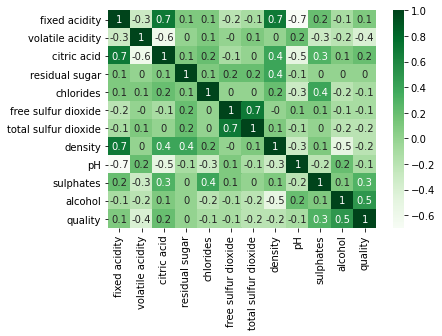

In [38]:
#df.boxplot()
#df["residual sugar"].plot()
import seaborn as sns
corr_mat = df.corr().round(1)
sns.heatmap(corr_mat, annot=True, cmap="Greens")


In [39]:
def un_normalize_values(norm_val, org_max_val, org_min_val):
    un_normalized = (norm_val*(org_max_val-org_min_val))+org_min_val
    return un_normalized

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
y = df["quality"].values
x = df.copy()
x = df.drop(columns="quality")
x=x.values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

lin_mod = LinearRegression().fit(x_train,y_train)
y_pred = lin_mod.predict(x_test)
MAE_lin_norm = mae(y_test,y_pred)
print("Normalized MAE for the linear model is {}".format(MAE_lin_norm))

Normalized MAE for the linear model is 0.10290327968605303


In [47]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import activations
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

mod = Sequential()
mod.add(layers.Dense(64))
mod.add(layers.Dense(16, activation="relu"))
mod.add(layers.Dense(16, activation="sigmoid"))
mod.add(Dense(1))

opt = optimizers.Adam(learning_rate=0.01)
mod.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=3,
    restore_best_weights=True,
)
history = mod.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10, verbose=0, callbacks = [callback])
#history = mod.fit(x, y, epochs=50)
loss, accuracy = mod.evaluate(x_test, y_test)
print("The normalized MSE for DL model is {}".format(loss))
print("The normalized MAE for DL model is {}".format(accuracy))

13/13 [==============================] - 0s 2ms/step - loss: 0.0174 - accuracy: 0.0125
The normalized MSE for DL model is 0.017364030703902245
The normalized MAE for DL model is 0.012500000186264515


In [48]:
MAE_lin = un_normalize_values(MAE_lin_norm,df_copy["quality"].max(), df_copy["quality"].min())
print("MAE of linear model is {}".format(MAE_lin))
MAE = un_normalize_values(accuracy,df_copy["quality"].max(), df_copy["quality"].min())
print("MAE of deep learning model is {}".format(MAE))
#MSE = un_normalize_values(loss,df_copy["quality"].max(), df_copy["quality"].min())
#print(MSE)


MAE of linear model is 3.514516398430265
MAE of deep learning model is 3.0625000009313226


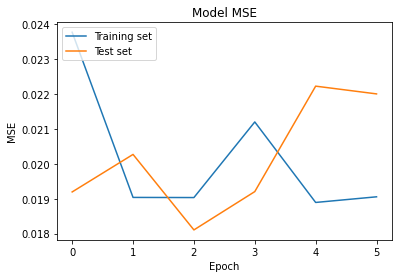

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

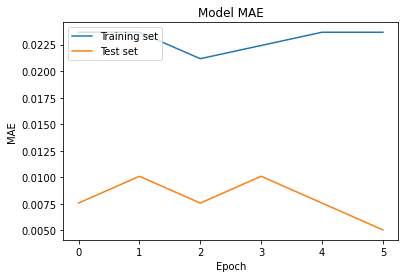

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

Text(0, 0.5, 'Predictions')

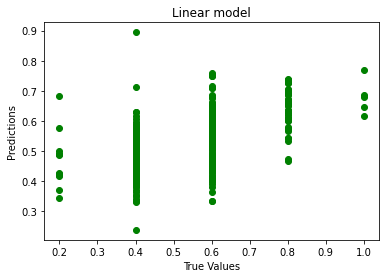

In [51]:
plt.scatter(y_test, y_pred, color='green',)
plt.title("Linear model")
plt.xlabel('True Values')
plt.ylabel('Predictions')

13/13 [==============================] - 0s 2ms/step


Text(0, 0.5, 'Predictions')

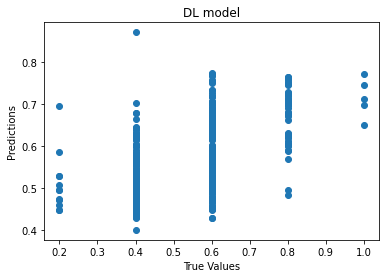

In [52]:
y_pred_deep = mod.predict(x_test)
plt.scatter(y_test, y_pred_deep)
plt.title("DL model")
plt.xlabel('True Values')
plt.ylabel('Predictions')